In [10]:
import pandas as pd
import os, fnmatch

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [6]:
scoresdf = pd.read_csv('Data/dicom/metadata_global_v2.csv')

In [8]:
scoresdf

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
0,15626316918619298757.dcm,20200403,CR,2802,2801,SIEMENS,MONOCHROME2,1,1,1,P2255,A0000,M,11
1,14564261561865340756.dcm,20200406,CR,2868,2320,Agfa,MONOCHROME1,2,2,1,P2291,A0001,M,8
2,3030367955559789319.dcm,20200405,CR,2866,2350,SIEMENS,MONOCHROME2,10,1,1,P2272,A0002,M,11
3,10548672632742803246.dcm,20200408,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,21,3,1,P2299,A0003,M,12
4,434139174381164494.dcm,20200409,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,1001,2,1,P2076,A0004,M,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,10409101678672828001.dcm,20200314,CR,3000,2364,SIEMENS,MONOCHROME2,1,1,0,P1071,A4582,M,10
4691,282205201992683717.dcm,20200318,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,122023,10,0,P1071,A4583,M,10
4692,9504330565338059035.dcm,20200322,CR,2866,1752,SIEMENS,MONOCHROME2,233133,15,0,P0193,A4584,M,14
4693,8824145367570793429.dcm,20200331,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,333133,16,0,P0193,A4585,M,14


# Information needed:

### What size are images?  
 - Images are different sizes. We need to resize images to fit traditional deep learning models (256 x 256)

### What is s-global and j-global score  

### How will we judge similarity  

# TO DO:

### Need to seperate images and scores into train and test.  
   - Train should contain 80% of data made up of half covid positive and half non-covid OR equal representation of all scores
   - Test should be made of remaining scores but representative of population  
      
### Need to cut out center of images
   - Consider rotating if performance is bad
   
### Implement Keras CNN library for image classification

In [11]:
# getting all names of files that are in image folder

files = fnmatch.filter(os.listdir('Data\dicom\dicom_clean'), "*.dcm")

In [13]:
# Getting boolean values if filename is in DB and image folder
bool_df = scoresdf.Filename.isin(files)

In [14]:
# Taking out all files that are not in image folder so we only have scores for images we need
f_scoresdf = scoresdf[bool_df]

In [15]:
f_scoresdf

,Filename,StudyDate,Modality,Columns,Rows,Manufacturer,PhotometricInterpretation,BrixiaScore,BrixiaScoreGlobal,ConsensusTestset,Subject,StudyId,Sex,AgeAtStudyDateFiveYear
53,1676455454280197974.dcm,20200404,CR,2747,1814,SIEMENS,MONOCHROME2,121111,7,1,P1890,A0053,M,17
70,17039339064828316241.dcm,20200407,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,123123,12,1,P1639,A0070,M,13
77,16668001774498297699.dcm,20200408,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,133223,14,1,P1204,A0077,M,13
103,10250146769603550054.dcm,20200408,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,1,1,1,P2075,A0103,F,11
104,1175320307456098547.dcm,20200403,DX,3032,2520,CARESTREAM HEALTH,MONOCHROME1,1,1,1,P2284,A0104,F,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,14195790053789930804.dcm,20200316,CR,2500,2048,KODAK,MONOCHROME2,333132,15,0,P1816,A4557,F,12
4667,10091376699707959251.dcm,20200322,CR,2868,2320,Agfa,MONOCHROME1,333133,16,0,P0648,A4559,F,16
4673,4216113973049207247.dcm,20200318,CR,2866,2350,SIEMENS,MONOCHROME2,333223,16,0,P0023,A4565,F,14
4675,8298482540279766620.dcm,20200317,CR,2866,2350,SIEMENS,MONOCHROME2,333232,16,0,P0814,A4567,F,16


In [19]:
len(f_scoresdf) / len(scoresdf)
# Only using 7% of available images

0.07220447284345048

In [22]:
import matplotlib.pyplot as plt

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, BatchNormalization, Activation, Flatten, Dropout, Lambda, Concatenate
from tensorflow.keras import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard

import os
import numpy as np
import scipy
import skimage

In [23]:
inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Define generators for the data
generator = image.ImageDataGenerator(
    data_format='channels_last',
    rescale=1. / 255
)

train_batches = generator.flow_from_directory(
    batch_size=16,
    directory='Data\dicom\dicom_clean',
    target_size=[100, 100],
    class_mode='categorical',
    shuffle=True,
)

Found 0 images belonging to 1 classes.


In [27]:
img = image.load_img('Data/dicom/dicom_clean/jpgs/img-00001-00001.jpg')

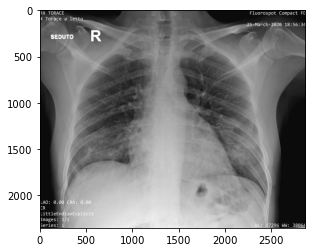

In [31]:
plt.imshow(img)

In [30]:
img = image.img_to_array(img)/255